# Zadania domowe, zestaw 3

W tym zestawie zadań proszę przygotować kod, który będzie generował podane poniżej obrazy. Rozwiązując zadania 1-3 można uzyskać 10 pkt. Za rozwiązanie zadań 1-4 otrzymasz 20 pkt. Za rozwiązanie wszystkich 5 zadań otrzymasz 30 pkt. Obrazek generowany przez kod z rozwiązania może różnić się w drobnych szczegółach, ale zasadniczy ''temat'' powinien być zachowany.

## Zadanie 1

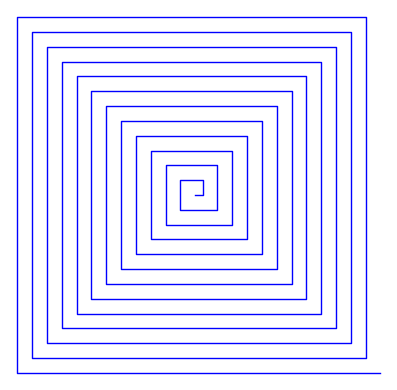

In [6]:
pos=0
steps=50
direction=1
length=1
vertices=[]
for _ in range(0,steps):
    vertices.append(pos)
    pos+=length*direction
    direction*=i
    length+=1

line(vertices,aspect_ratio=1,axes=False)

## Zadanie 2

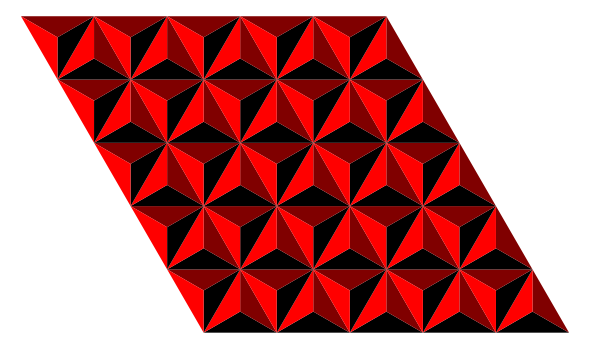

In [30]:
#wierzchołki
z1 = vector([0,0])
z2 = vector([1,0])
z3 = vector([1/2,sqrt(3)/2])
z4 = vector([-1/2,sqrt(3)/2])
w1 = 1/3*(z1+z2+z3)
w2 = 1/3*(z1+z3+z4)
lat=[vector([1,0]),vector([-1/2,sqrt(3)/2])]

#sciany
faces=[[z1,z2,w1],[z2,z3,w1],[z1,w1,z3],[z1,z3,w2],[z3,z4,w2],[z1,w2,z4]]

def draw_l(li,col):
    return polygon(li+[li[0]],color=col)

def shift_l(li,shift):
    return [x+shift for x in li]

gra=Graphics()
spect=[k/10 for k in range(0,10)]
for i in range(0,5):
    for j in range(0,5):
        for k in range(0,6):
            f=faces[k]
            fmod=shift_l(f,lat[0]*i+lat[1]*j)
            gra+=draw_l(fmod,((k%3)/2,0,0))
    
show(gra,aspect_ratio=1,axes=False)

## Zadanie 3

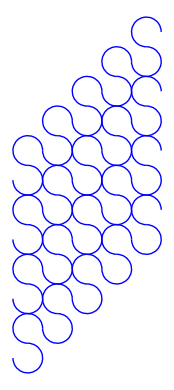

In [72]:
mot= lambda x,y: arc((x,y),1,1,sector=(0,3/2*pi))+arc((x,y-2),1,1,sector=((2+1/2)*pi,(2-1)*pi))
show(sum(mot(2*k,2*k+4*m) for k in range(0,5) for m in range(0,4)),axes=False,aspect_ratio=1)

## Zadanie 4

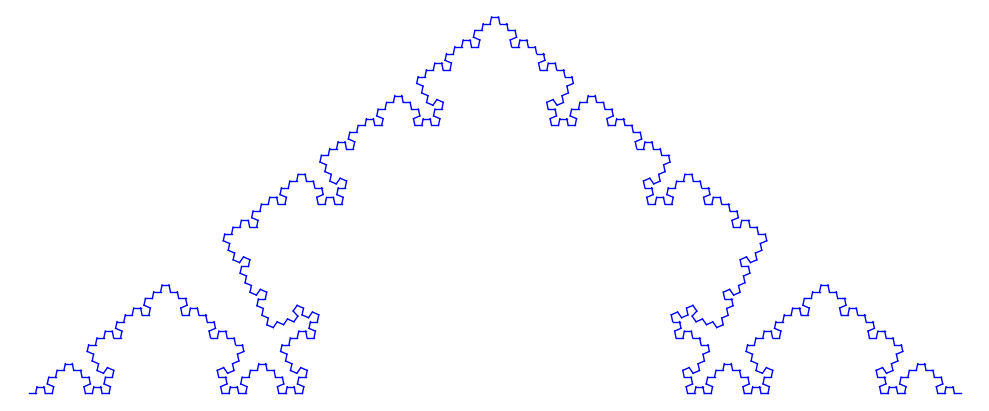

In [36]:
def F(state,gra): #narysuj linię w kierunku wynaczonym zmienną angle, z punktu (x,y) i o długości l
    pos=state[0]
    angle=state[1]
    l=state[2]
    x=pos[0]
    y=pos[1]
    xend=x+l*cos(angle)
    yend=y+l*sin(angle)
    draw=line([(x,y),(xend,yend)],axes=False,aspect_ratio=1)
    gra=gra+draw
    return [[xend,yend],angle,l],gra

def f(state,gra): #przesuń się nad płaszczyzną o linię w kierunku wynaczonym zmienną angle, z punktu (x,y) i o długości l
    pos=state[0]
    angle=state[1]
    l=state[2]
    x=pos[0]
    y=pos[1]
    xend=x+l*cos(angle)
    yend=y+l*sin(angle)
    return [[xend,yend],angle,l],gra

def a(state,gra,delta): #obróć się o kąt delta
    pos=state[0]
    angle=state[1]
    l=state[2]
    x=pos[0]
    y=pos[1]
    return [[x,y],angle+delta,l],gra

def ApplyRule(str1,replrule): #zastosowanie reguł ze słownika replrule
    return''.join([replrule[x] for x in str1])

def DrawPatt(str1,state,gra,angle):
    while len(str1) >0:
        s=str1[0]
        schop=str1[1:len(str1)]
        if s=="F":
            state,gra=F(state,gra)
        if s=="f":
            state,gra=f(state,gra)
        if s=="p":
            state,gra=a(state,gra,angle)
        if s=="m":
            state,gra=a(state,gra,-angle)
        str1=schop
    return state,gra


axiom="F" 
replrule={"F":"FpFmFmFpF", "p":"p","m":"m"}

state0=[[0,0],0,1]
gra0=Graphics()


#Iteracje funkcji
def f1(s,n):
    while n>0:
        s,n=ApplyRule(s,replrule),n-1
    return s


_,qq=DrawPatt(f1(axiom,4),state0,gra0,pi/2.3)
show(qq,axes=False,aspect_ratio=1,figsize=[10,10])

## Zadanie 5

In [1]:
#inspirowane pracą Robert W. Fathauer, Computers & Graphics 25 (2001)
#https://doi.org/10.1016/S0097-8493(00)00134-5
def rotate(v,theta):
    m=matrix(2,2,[cos(theta),-sin(theta),sin(theta),cos(theta)])
    return m*v

def rotate_l(li,theta):
    return [rotate(v,theta) for v in li]

def draw_l(li,col='green'):
    return polygon(li+[li[0]],color=col)
def scale_l(li,scale):
    return [scale*v for v in li]
def shift_l(li,shift):
    return [v+shift for v in li]
def rot_at_p(li,theta,p):
    li2=shift_l(li,-p)
    li2=rotate_l(li2,theta)
    return shift_l(li2,p)
def reflect(p0,p,re):
    pp=p0-p
    rp=vector([-re[1],re[0]])
    return pp-(2*(pp*rp)/(rp*rp))*rp+p
def reflect_l(li,p,re):
    return [reflect(v,p,re) for v in li]
    

v1=vector([0,0])
v2=vector([cos(pi/2-pi/8),sin(pi/2-pi/8)])
v3=v2+(tan(pi/8))*rotate(v2,pi/2)
v4=vector([-v2[0],v2[1]])

ksztalt=rotate_l([v1,v2,v3,v4],-pi/8)

def Sgen(n):
    instr='dddd'
    end='k'
    for i in range(0,n):
        newend=end+'dk'
        instr=instr+end+instr+end+instr
        end=newend
    return instr+end

def Odbicie(symb,fig,orient):
    if symb=='d':
        return reflect_l(fig,fig[orient[0]],fig[orient[3]]-fig[orient[0]]),[orient[0],orient[3],orient[2],orient[1]]
    else:
        return reflect_l(fig,fig[orient[3]],fig[orient[3]]-fig[orient[2]]),[orient[0],orient[3],orient[2],orient[1]]

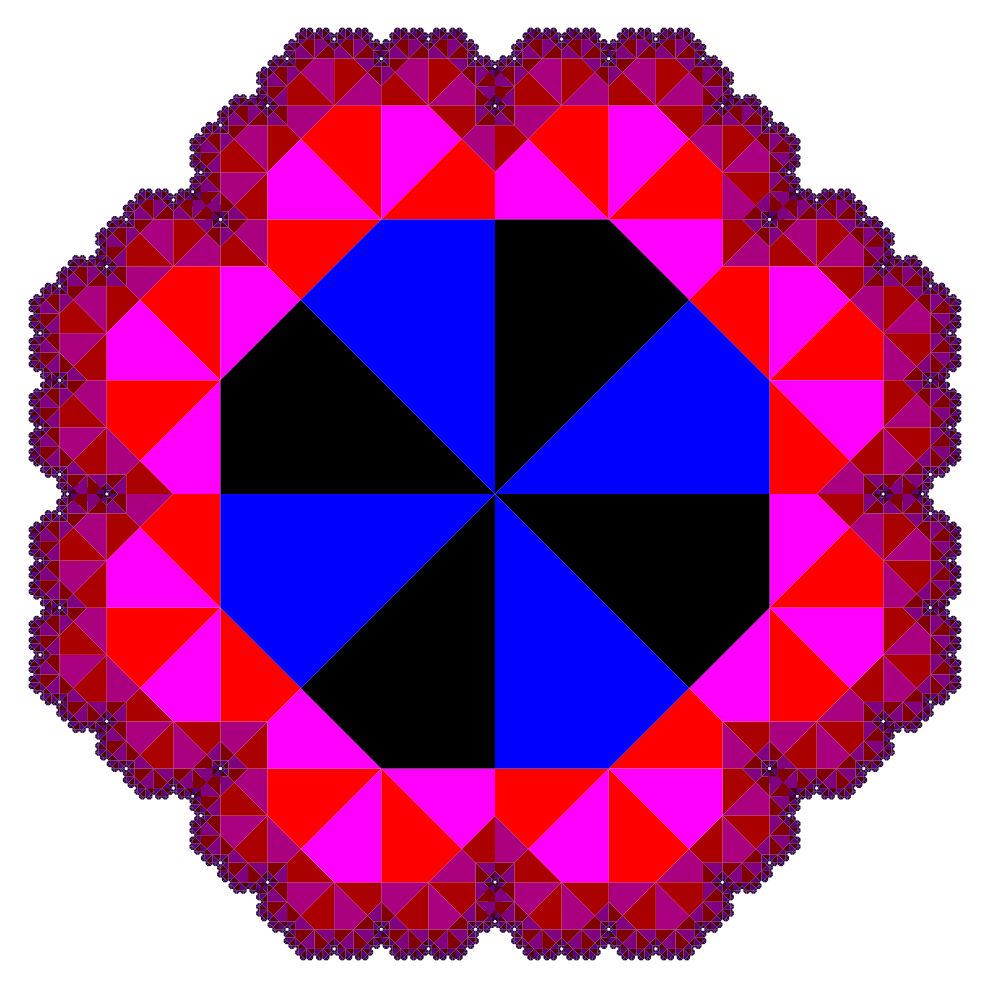

In [56]:
gra=Graphics()
ksztaltn=[vector([v[0].n(),v[1].n()]) for v in ksztalt]
for c in range(0,8):
    gra = draw_l(rotate_l(ksztaltn,c*(pi/4).n()),(0,0,c%2)) + gra
    
k2=scale_l(ksztaltn,(sqrt(2)-1).n())
k2=rotate_l(k2,(-pi/2).n())
k2=shift_l(k2,ksztaltn[2])
k2b=k2

gra=draw_l(k2,(1,0,1))+gra

gg=Sgen(0)
orient=[0,1,2,3]
c=1
for _ in range(0,8):
    for s in gg:
        c+=1
        k2,orient=Odbicie(s,k2,orient)
        gra = draw_l(k2,(1,0,(c%2)))+gra

n=6
for i in range(2,n):
    k2=scale_l(ksztaltn,((sqrt(2)-1)^(i)).n())
    k2=rotate_l(k2,(-(1+(i-3)/4)*pi).n())
    k2=shift_l(k2,rot_at_p(k2b,(pi/4).n(),k2b[0])[2])
    c=1
    gra+=draw_l(k2,((n-i)/n,0,(c%2)/2))

    k2b=k2
    gg=Sgen(i-1)
    orient=[0,1,2,3]
    for _ in range(0,8):
        for s in gg:
            c+=1
            k2,orient=Odbicie(s,k2,orient)
            gra=draw_l(k2,((n-i)/n,0,(c%2)/2))+gra

show(gra,aspect_ratio=1,axes=False,figsize=[10,10])